# Exercise TI.1

**Exercise TI.1** *(Law of Large Numbers — Coins)*

In subtask (a) we have seen how we can approximate the parameter $p$ of our coin flip experiment. In subtask (b) we computed two bounds on the expected number of tosses needed to approximate the true value of $p$ within an error margin of $0.1$ correctly $90\%$ of the time.

(c) (i) implement a function that generates random variates $Z_n$ for set parameters $p$ and $n$

In [14]:
from numpy.random import random as uniform

# n will be either 25, 50, 75, ..., 250
# p will be a value in [0, 1]
def generate_Zn(n: int, p: float) -> float:
    # Your code goes here

    X_i = uniform(n)

    X_i[X_i < p] = 1
    X_i[X_i != 1] = 0
    return sum(X_i)/n

(c) (ii) given $n$, generate 5000 variates of $Z_n$ to compute $P(\vert Z_n - p\vert < 0.1)$

In [33]:
# For this simulation, assume
p = 0.6

# n will be either 25, 50, 75, ..., 250
def approx_P_5000(n: int) -> float:
    # Your code goes here
    is_smaller = 0
    for i in range(5000):
        if abs(generate_Zn(n, p) - p) < 0.1:
            is_smaller += 1
    return is_smaller/5000


In (b) (i) we obtained the bound

$$
\begin{align*}
  0.9 &\leq P(\vert Z_n - p \vert \leq 0.1) \\
  &= \text{?}
\end{align*}
$$

In [49]:
def approx_chebyshev(n: int) -> float:
    return 1-1/(4*n*0.1**2)


In (b) (i) we obtained the bound

$$
\begin{align*}
  0.9 &\leq P(\vert Z_n - p \vert \leq 0.1) \\
  &= \text{?}
\end{align*}
$$

In [60]:
from scipy.stats import norm # CDF of the standard normal distribution

def approx_central_limit(n: int) -> float:
    # Your code goes here
    return norm.cdf(np.sqrt(n)*(0.1/np.sqrt(p*(1-p)))) #>= 0.95
    # return 0.0

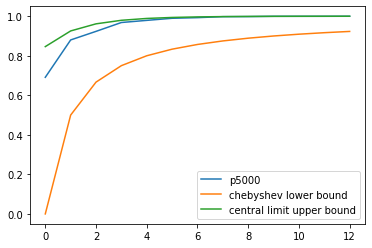

In [65]:
import matplotlib.pyplot as plt
import numpy as np

def draw_plot():
    # use the plt.plot() to depict your experiment
    # See: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html

    p5000 = []
    X = list(range(25, 350, 25))
    chebyshev = []
    limit = []
    for n in range(25, 350, 25):
        p5000.append(approx_P_5000(n))
        chebyshev.append(approx_chebyshev(n))
        limit.append(approx_central_limit(n))
    plt.plot(p5000, label='p5000')

    # chebyshev lower bound
    plt.plot(chebyshev, label='chebyshev lower bound')
    plt.plot(limit, label='central limit upper bound')

    plt.legend()
    # plt.show()
    plt.savefig('plot.png', dpi=300)

draw_plot()

# Exercise TI.3

**Exercise TI.3** *(Monte-Carlo Simulation)*

We consider the function

$$
f(x) = k\cdot{} e^{-x^3 + 1.5 x^2}
$$

for $x \in [0, 3]$. Implement the function `compute_k` that computes the value $k$ for which $f$ is a PDF.
Then, implement `compute_expectation`, which computes the expected value of $f$ with the correct parameter $k$.

In [66]:
from numpy import exp

"""
    f(k) returns the function f with parameter k.
        e.g. f(2)(0) evaluates f with k=2 at x=0, resulting in 2.
"""
def f(k):
    # You don't need to modify this function
    def f_k(x):
        return k * exp(-x**3 + 1.5 * x**2)
    return f_k

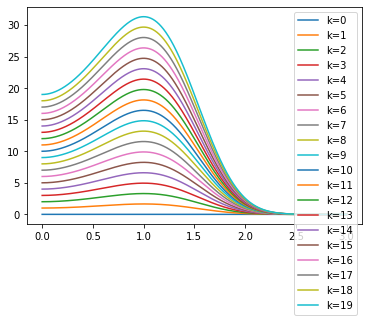

best k: 1
closest: 0.23819355254363495


0.0

0.0 0.0
0.020202020202020204 0.01539002924154253
0.04040404040404041 0.03078005848308506
0.06060606060606061 0.04617008772463092
0.08080808080808081 0.06156011696617012
0.10101010101010102 0.07695014620771566
0.12121212121212122 0.09234017544926185
0.14141414141414144 0.10773020469078591
0.16161616161616163 0.12312023393234024
0.18181818181818182 0.13851026317388568
0.20202020202020204 0.15390029241543132
0.22222222222222224 0.16929032165696487
0.24242424242424243 0.1846803508985237
0.26262626262626265 0.20007038014005799
0.2828282828282829 0.21546040938157182
0.30303030303030304 0.23085043862313087
0.32323232323232326 0.24624046786468048
0.3434343434343435 0.2616304971062255
0.36363636363636365 0.27702052634777136
0.38383838383838387 0.292410555589308
0.4040404040404041 0.30780058483086264
0.42424242424242425 0.32319061407240895
0.4444444444444445 0.33858064331392973
0.4646464646464647 0.3539706725554776
0.48484848484848486 0.3693607017970474
0.5050505050505051 0.38475073103858065
0.5

0.0

In [74]:
N = 10**6

def compute_k():
    best_k = None
    closest = 99999999999999999
    for k in np.linspace(0, 2, 100):
        x = np.linspace(0, 3, N)
        y = f(k)(x)
        # y /= N
        total = sum(y)
        total /= N
        print(k, total)
        if abs(total - 1) < closest:
            closest = abs(total - 1)
            best_k = k
        # plt.plot(x, y, label='k={}'.format(k))

    # plt.legend()
    # plt.show()
    print('best k: {}'.format(best_k))
    print('closest: {}'.format(closest))
    return best_k

In [76]:
def compute_expectation():
    k = compute_k()
    x = np.linspace(0, 3, N)
    y = f(k)(x)
    expected = np.dot(x, y)
    expected /= N
    return expected
    # return 0.0

compute_expectation()

0.0 0.0
0.020202020202020204 0.01539002924154253
0.04040404040404041 0.03078005848308506
0.06060606060606061 0.04617008772463092
0.08080808080808081 0.06156011696617012
0.10101010101010102 0.07695014620771566
0.12121212121212122 0.09234017544926185
0.14141414141414144 0.10773020469078591
0.16161616161616163 0.12312023393234024
0.18181818181818182 0.13851026317388568
0.20202020202020204 0.15390029241543132
0.22222222222222224 0.16929032165696487
0.24242424242424243 0.1846803508985237
0.26262626262626265 0.20007038014005799
0.2828282828282829 0.21546040938157182
0.30303030303030304 0.23085043862313087
0.32323232323232326 0.24624046786468048
0.3434343434343435 0.2616304971062255
0.36363636363636365 0.27702052634777136
0.38383838383838387 0.292410555589308
0.4040404040404041 0.30780058483086264
0.42424242424242425 0.32319061407240895
0.4444444444444445 0.33858064331392973
0.4646464646464647 0.3539706725554776
0.48484848484848486 0.3693607017970474
0.5050505050505051 0.38475073103858065
0.5

0.8986971196502441